# 한국어 - 영어 번역기 만들기

## 라이브러리 import

In [1]:
import tensorflow as tf
import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

import time
import re
import os
import io
import random

print(tf.__version__)

2.4.1


## 데이터 불러오기

In [2]:
file_path = os.getenv('HOME')+'/aiffel/GoingDeeper/Project04'
with open(file_path+'/{}'.format('korean-english-park.train.ko'), "r") as f:
        raw_kor = f.read().splitlines()
        
print(type(raw_kor))
for sen in raw_kor[:10] :
    print(">>> ",sen)
print('total data size:', len(raw_kor))

<class 'list'>
>>>  개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>>>  모든 광마우스와 마찬가지 로 이 광마우스도 책상 위에 놓는 마우스 패드를 필요로 하지 않는다.
>>>  그러나 이것은 또한 책상도 필요로 하지 않는다.
>>>  79.95달러하는 이 최첨단 무선 광마우스는 허공에서 팔목, 팔, 그외에 어떤 부분이든 그 움직임에따라 커서의 움직임을 조절하는 회전 운동 센서를 사용하고 있다.
>>>  정보 관리들은 동남 아시아에서의 선박들에 대한 많은 (테러) 계획들이 실패로 돌아갔음을 밝혔으며, 세계 해상 교역량의 거의 3분의 1을 운송하는 좁은 해로인 말라카 해협이 테러 공격을 당하기 쉽다고 경고하고 있다.
>>>  이 지역에 있는 미국 선박과 상업용 선박들에 대한 알카에다의 (테러) 시도 중 여러 건이 실패했다는 것을 알게 된 후에, 전문가들은 테러 조직이 여전히 세계 경제에 타격을 입히려 한다고 경고하고 있으며, 동남 아시아에 있는 세계 경제의 주요 통로가 위험에 처해 있다고 그들은 생각하고 있다.
>>>  국립 과학 학회가 발표한 새 보고서에따르면, 복잡한 임무를 수행해야 하는 군인들이나 보다 오랜 시간 동안 경계를 늦추지 않고 있기 위해 도움이 필요한 군인들에게 카페인이 반응 시간을 증가시키고 임무 수행 능력을 향상시키는데 도움이 된다고 한다.
>>>  이 보고서에따르면, "특히, 군사 작전에서 생사가 걸린 상황이 될 수도 있는 반응 속도와 시각 및 청각의 경계 상태를 유지시키기 위해 카페인이 사용될 수도 있다." 고 한다.
>>>  "결정적인 순간에 그들의 능력을 증가시켜 줄 그 무엇이 매우 중요합니다."
>>>  연구가들이 이미 커피 대체품으로서 음식 대용 과자나 껌에 카페인을 첨가하는 방법을 연구하고 있다고 Archibald는 말했다.
total data size: 94123


In [3]:
file_path = os.getenv('HOME')+'/aiffel/GoingDeeper/Project04'
with open(file_path+'/{}'.format('korean-english-park.train.en'), "r") as f:
        raw_eng = f.read().splitlines()
        
print(type(raw_eng))
for sen in raw_eng[:10] :
    print(">>> ",sen)
print('total data size:', len(raw_eng))

<class 'list'>
>>>  Much of personal computing is about "can you top this?"
>>>  so a mention a few weeks ago about a rechargeable wireless optical mouse brought in another rechargeable, wireless mouse.
>>>  Like all optical mice, But it also doesn't need a desk.
>>>  uses gyroscopic sensors to control the cursor movement as you move your wrist, arm, whatever through the air.
>>>  Intelligence officials have revealed a spate of foiled plots on ships in Southeast Asia and are warning that a narrow stretch of water carrying almost one third of the world's maritime trade is vulnerable to a terror attack.
>>>  After learning of several foiled al Qaeda attempts on U.S. and commercial ships in the area, experts are warning that the terror network still wants to cripple the global economy, the world's economic jugular vein in Southeast Asia is at risk.
>>>  Caffeine can help increase reaction time and improve performance for military servicemen who must perform complex tasks or who need help 

## set 활용 중복 데이터 제거

In [4]:
raw = zip(raw_kor, raw_eng)
raw

In [5]:
set_raw = set(raw)
len(set_raw)

78968

In [6]:
cleaned_corpus_kor,cleaned_corpus_eng = zip(*set_raw)

In [7]:
print(cleaned_corpus_kor[5])
print(cleaned_corpus_eng[5])

보리스 타디치 세르비아 대통령은 “코소보의 독립선언이 분리주의자들로 구성된 주를 가진 다른 국가들에게 위험한 선례가 될 수 있다”고 경고했다.
Tadic asked the U.N. Security Council to annul the declaration of independence.


In [8]:
print('korean data size:', len(cleaned_corpus_kor))
print('english data size:', len(cleaned_corpus_eng))

korean data size: 78968
english data size: 78968


In [9]:
def preprocess_sentence(sentence, s_token=False, e_token=False):
    sentence = sentence.lower().strip()

    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = re.sub(r'[" "]+', " ", sentence)
    sentence = re.sub(r"[^a-zA-Z가-힣ㄱ-ㅎㅏ-ㅣ?.!,]+", " ", sentence)

    sentence = sentence.strip()

    if s_token:
        sentence = '<start> ' + sentence

    if e_token:
        sentence += ' <end>'
    
    return sentence

In [10]:
enc_corpus = []
dec_corpus = []

#num_examples = 30000

for kor, eng in zip(cleaned_corpus_kor, cleaned_corpus_eng):
    temp_kor = preprocess_sentence(kor)
    temp_eng = preprocess_sentence(eng, s_token=True, e_token=True)

    if len(temp_kor) <= 40:
        enc_corpus.append(temp_kor)
        dec_corpus.append(temp_eng)
    
print('korean data size:', len(enc_corpus))
print('english data size:', len(dec_corpus))
print("Korean:", enc_corpus[100])   
print("English:", dec_corpus[100])

korean data size: 16261
english data size: 16261
Korean: 년 알프레드 노벨 기념회에서 스웨덴 중앙은행이 이 상을 창설했다 .
English: <start> it was created in by the swedish central bank in alfred nobel s memory . <end>


In [11]:
print("Korean:", enc_corpus[3])   
print("English:", dec_corpus[3])

Korean: 그는 어떤 것도 그렇게 하지 못할 것으로 생각합니다 .
English: <start> he doesn t think anything will <end>


In [12]:
print("Korean:", enc_corpus[10])   
print("English:", dec_corpus[10])

Korean: 년간 개량된 블루투스 . 버전은 올 가을 출시될 예정이다 .
English: <start> that should happen this fall , when the first bluetooth upgrade in three years , bluetooth . , starts shipping . <end>


## 데이터 토큰화

In [13]:
from konlpy.tag import Mecab
vocab_size = 50000
#한국어는 konlpy Mecab 형태소 분석기를 이용하여 전처리해줘야함
def tokenize_kor(corpus):
    mecab = Mecab()
    morph = [" ".join(mecab.morphs(sen)) for sen in corpus]
    
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='',
                                                      num_words = vocab_size)
    tokenizer.fit_on_texts(morph)

    tensor = tokenizer.texts_to_sequences(morph)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer

def tokenize_eng(corpus):
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='', 
                                                      num_words = vocab_size)
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer

In [14]:
# 토큰화하기
enc_tensor, enc_tokenizer = tokenize_kor(enc_corpus)
dec_tensor, dec_tokenizer = tokenize_eng(dec_corpus)
# 훈련 데이터와 검증 데이터로 분리하기

enc_train, enc_val, dec_train, dec_val = \
train_test_split(enc_tensor, dec_tensor, test_size=0.2)

print("Korean Vocab Size:", len(enc_tokenizer.index_word))
print("English Vocab Size:", len(dec_tokenizer.index_word))

Korean Vocab Size: 17364
English Vocab Size: 16849


In [15]:
print(len(enc_tensor))
print(len(dec_tensor))
print(len(enc_train))
print(len(enc_val))

16261
16261
13008
3253


## 모델 설계

In [16]:
class BahdanauAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.w_dec = tf.keras.layers.Dense(units)
        self.w_enc = tf.keras.layers.Dense(units)
        self.w_com = tf.keras.layers.Dense(1)
    
    def call(self, h_enc, h_dec):
        # h_enc shape: [batch x length x units]
        # h_dec shape: [batch x units]

        h_enc = self.w_enc(h_enc)
        h_dec = tf.expand_dims(h_dec, 1)
        h_dec = self.w_dec(h_dec)

        score = self.w_com(tf.nn.tanh(h_dec + h_enc))
        
        attn = tf.nn.softmax(score, axis=1)

        context_vec = attn * h_enc
        context_vec = tf.reduce_sum(context_vec, axis=1)

        return context_vec, attn

In [17]:
class Encoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, enc_units):
        super(Encoder, self).__init__()
        
        self.enc_units = enc_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(enc_units,
                                       return_sequences=True)
        
    def call(self, x):
        out = self.embedding(x)
        out = self.gru(out)
        
        return out

In [18]:
class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, dec_units):
        super(Decoder, self).__init__()
        self.dec_units = dec_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(dec_units,
                                       return_sequences=True,
                                       return_state=True)
        self.fc = tf.keras.layers.Dense(vocab_size)

        self.attention = BahdanauAttention(self.dec_units)

    def call(self, x, h_dec, enc_out):
        context_vec, attn = self.attention(enc_out, h_dec)

        out = self.embedding(x)
        out = tf.concat([tf.expand_dims(context_vec, 1), out], axis=-1)
        
        out, h_dec = self.gru(out)
        out = tf.reshape(out, (-1, out.shape[2]))
        out = self.fc(out)

        return out, h_dec, attn

In [19]:
BATCH_SIZE     = 64
SRC_VOCAB_SIZE = len(enc_tokenizer.index_word) + 1
TGT_VOCAB_SIZE = len(dec_tokenizer.index_word) + 1

units         = 128
embedding_dim = 128

encoder = Encoder(SRC_VOCAB_SIZE, embedding_dim, units)
decoder = Decoder(TGT_VOCAB_SIZE, embedding_dim, units)

# sample input
sequence_len = 30

sample_enc = tf.random.uniform((BATCH_SIZE, sequence_len))
sample_output = encoder(sample_enc)

print ('Encoder Output:', sample_output.shape)

sample_state = tf.random.uniform((BATCH_SIZE, units))

sample_logits, h_dec, attn = decoder(tf.random.uniform((BATCH_SIZE, 1)),
                                     sample_state, sample_output)

print ('Decoder Output:', sample_logits.shape)
print ('Decoder Hidden State:', h_dec.shape)
print ('Attention:', attn.shape)

Encoder Output: (64, 30, 128)
Decoder Output: (64, 16850)
Decoder Hidden State: (64, 128)
Attention: (64, 30, 1)


In [20]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss = loss_object(real, pred)
    
    mask = tf.cast(mask, dtype=loss.dtype)
    loss *= mask
    
    return tf.reduce_mean(loss)

In [21]:
@tf.function
def train_step(src, tgt, encoder, decoder, optimizer, dec_tok):
    bsz = src.shape[0]
    loss = 0

    with tf.GradientTape() as tape:
        enc_out = encoder(src)
        h_dec = enc_out[:, -1]
        
        dec_src = tf.expand_dims([dec_tok.word_index['<start>']] * bsz, 1)

        for t in range(1, tgt.shape[1]):
            pred, h_dec, _ = decoder(dec_src, h_dec, enc_out)

            loss += loss_function(tgt[:, t], pred)
            dec_src = tf.expand_dims(tgt[:, t], 1)
        
    batch_loss = (loss / int(tgt.shape[1]))

    variables = encoder.trainable_variables + decoder.trainable_variables
    gradients = tape.gradient(loss, variables)
    optimizer.apply_gradients(zip(gradients, variables))
    
    return batch_loss

In [22]:
def evaluate(sentence, encoder, decoder):
    attention = np.zeros((dec_train.shape[-1], enc_train.shape[-1]))
    
    sentence = preprocess_sentence(sentence)
    inputs = enc_tokenizer.texts_to_sequences([sentence.split()])
    inputs = tf.keras.preprocessing.sequence.pad_sequences(inputs,
                                                           maxlen=enc_train.shape[-1],
                                                           padding='post')

    result = ''

    enc_out = encoder(inputs)

    dec_hidden = enc_out[:, -1]
    dec_input = tf.expand_dims([dec_tokenizer.word_index['<start>']], 0)

    for t in range(dec_train.shape[-1]):
        predictions, dec_hidden, attention_weights = decoder(dec_input,
                                                             dec_hidden,
                                                             enc_out)

        attention_weights = tf.reshape(attention_weights, (-1, ))
        attention[t] = attention_weights.numpy()

        predicted_id = \
        tf.argmax(tf.math.softmax(predictions, axis=-1)[0]).numpy()

        result += dec_tokenizer.index_word[predicted_id] + ' '

        if dec_tokenizer.index_word[predicted_id] == '<end>':
            return result, sentence, attention

        dec_input = tf.expand_dims([predicted_id], 0)

    return result, sentence, attention


def plot_attention(attention, sentence, predicted_sentence):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(attention, cmap='viridis')

    fontdict = {'fontsize': 14}

    ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
    ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()


def translate(sentence, encoder, decoder):
    result, sentence, attention = evaluate(sentence, encoder, decoder)

    print('Input: %s' % (sentence))
    print('Predicted translation: {}'.format(result))
    
    #attention = attention[:len(result.split()), :len(sentence.split())]
    #plot_attention(attention, sentence.split(), result.split(' '))

In [23]:
example = {"시민들은 도시 속에 산다.","커피는 필요 없다.","일곱 명의 사망자가 발생했다.","오바마는 대통령이다."}

## 모델 학습

In [24]:
# Define eval_step

@tf.function
def eval_step(src, tgt, encoder, decoder, dec_tok):
    bsz = src.shape[0]
    loss = 0

    enc_out = encoder(src)

    h_dec = enc_out[:, -1]
    
    dec_src = tf.expand_dims([dec_tok.word_index['<start>']] * bsz, 1)

    for t in range(1, tgt.shape[1]):
        pred, h_dec, _ = decoder(dec_src, h_dec, enc_out)

        loss += loss_function(tgt[:, t], pred)
        dec_src = tf.expand_dims(tgt[:, t], 1)
        
    batch_loss = (loss / int(tgt.shape[1]))
    
    return batch_loss


# Training Process

from tqdm import tqdm

EPOCHS = 30

for epoch in range(EPOCHS):
    total_loss = 0
    
    idx_list = list(range(0, enc_train.shape[0], BATCH_SIZE))
    random.shuffle(idx_list)
    t = tqdm(idx_list)

    for (batch, idx) in enumerate(t):
        batch_loss = train_step(enc_train[idx:idx+BATCH_SIZE],
                                dec_train[idx:idx+BATCH_SIZE],
                                encoder,
                                decoder,
                                optimizer,
                                dec_tokenizer)
    
        total_loss += batch_loss
        
        t.set_description_str('Epoch %2d' % (epoch + 1))
        t.set_postfix_str('Loss %.4f' % (total_loss.numpy() / (batch + 1)))
    
    test_loss = 0
    
    idx_list = list(range(0, enc_val.shape[0], BATCH_SIZE))
    random.shuffle(idx_list)
    t = tqdm(idx_list)

    for (test_batch, idx) in enumerate(t):
        test_batch_loss = eval_step(enc_val[idx:idx+BATCH_SIZE],
                                    dec_val[idx:idx+BATCH_SIZE],
                                    encoder,
                                    decoder,
                                    dec_tokenizer)
    
        test_loss += test_batch_loss

        t.set_description_str('Test Epoch %2d' % (epoch + 1))
        t.set_postfix_str('Test Loss %.4f' % (test_loss.numpy() / (test_batch + 1)))
        
    for sen in example :
        translate(sen, encoder, decoder)

  0%|          | 0/204 [00:00<?, ?it/s]

Input: 오바마는 대통령이다 .
Predicted translation: <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: <end> 
Input: 커피는 필요 없다 .
Predicted translation: <end> 
Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: <end> 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 오바마는 대통령이다 .
Predicted translation: <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: <end> 
Input: 커피는 필요 없다 .
Predicted translation: <end> 
Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: <end> 


Test Epoch  3: 100%|██████████| 51/51 [00:07<00:00,  6.39it/s, Test Loss 1.4052]


Input: 오바마는 대통령이다 .
Predicted translation: . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Input: 시민들은 도시 속에 산다 .
Predicted translation: . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Input: 커피는 필요 없다 .
Predicted translation: . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 오바마는 대통령이다 .
Predicted translation: <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: <end> 
Input: 커피는 필요 없다 .
Predicted translation: <end> 
Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: <end> 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 오바마는 대통령이다 .
Predicted translation: <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: <end> 
Input: 커피는 필요 없다 .
Predicted translation: <end> 
Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: <end> 


Test Epoch  6: 100%|██████████| 51/51 [00:07<00:00,  6.40it/s, Test Loss 1.4153]


Input: 오바마는 대통령이다 .
Predicted translation: . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Input: 시민들은 도시 속에 산다 .
Predicted translation: . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Input: 커피는 필요 없다 .
Predicted translation: . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 오바마는 대통령이다 .
Predicted translation: <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: <end> 
Input: 커피는 필요 없다 .
Predicted translation: <end> 
Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: <end> 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 오바마는 대통령이다 .
Predicted translation: <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: <end> 
Input: 커피는 필요 없다 .
Predicted translation: <end> 
Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: <end> 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 오바마는 대통령이다 .
Predicted translation: <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: <end> 
Input: 커피는 필요 없다 .
Predicted translation: <end> 
Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: <end> 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 오바마는 대통령이다 .
Predicted translation: <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: <end> 
Input: 커피는 필요 없다 .
Predicted translation: <end> 
Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: <end> 


Test Epoch 11: 100%|██████████| 51/51 [00:07<00:00,  6.41it/s, Test Loss 1.4212]


Input: 오바마는 대통령이다 .
Predicted translation: the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the 
Input: 시민들은 도시 속에 산다 .
Predicted translation: the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the 
Input: 커피는 필요 없다 .
Predicted translation: the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the 


Test Epoch 12: 100%|██████████| 51/51 [00:07<00:00,  6.40it/s, Test Loss 1.3286]


Input: 오바마는 대통령이다 .
Predicted translation: the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the 
Input: 시민들은 도시 속에 산다 .
Predicted translation: the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the 
Input: 커피는 필요 없다 .
Predicted translation: the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the 


Test Epoch 13: 100%|██████████| 51/51 [00:07<00:00,  6.39it/s, Test Loss 1.2978]


Input: 오바마는 대통령이다 .
Predicted translation: the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the 
Input: 시민들은 도시 속에 산다 .
Predicted translation: the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the 
Input: 커피는 필요 없다 .
Predicted translation: the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 오바마는 대통령이다 .
Predicted translation: the first . <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: the first . <end> 
Input: 커피는 필요 없다 .
Predicted translation: the first . <end> 
Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: the first . <end> 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 오바마는 대통령이다 .
Predicted translation: the first . <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: the first . <end> 
Input: 커피는 필요 없다 .
Predicted translation: the first . <end> 
Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: the first . <end> 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 오바마는 대통령이다 .
Predicted translation: the . <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: the . <end> 
Input: 커피는 필요 없다 .
Predicted translation: the first . <end> 
Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: the first . <end> 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 오바마는 대통령이다 .
Predicted translation: the first . <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: the first year . <end> 
Input: 커피는 필요 없다 .
Predicted translation: the first . <end> 
Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: the first year . <end> 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 오바마는 대통령이다 .
Predicted translation: the first time . <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: the first time . <end> 
Input: 커피는 필요 없다 .
Predicted translation: he s . <end> 
Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: the first year . <end> 


Test Epoch 19: 100%|██████████| 51/51 [00:08<00:00,  6.13it/s, Test Loss 1.2148]


Input: 오바마는 대통령이다 .
Predicted translation: the first . <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: the first , and the first year old . <end> 
Input: 커피는 필요 없다 .
Predicted translation: he is a new york , he s . <end> 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: the first , the first , the first , the first , the first , the first , the first , the first , the first , the first , the first , the first , the first , the first , the first , the first , the first , the first , the first , the first , the first , the first , the first , the first 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 오바마는 대통령이다 .
Predicted translation: the ap s . <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: the ap s . <end> 
Input: 커피는 필요 없다 .
Predicted translation: i m . <end> 
Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: the u . s . <end> 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 오바마는 대통령이다 .
Predicted translation: the ap s . <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: the ap s . <end> 
Input: 커피는 필요 없다 .
Predicted translation: it s . <end> 
Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: the first time . <end> 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 오바마는 대통령이다 .
Predicted translation: . <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: the ap s . <end> 
Input: 커피는 필요 없다 .
Predicted translation: i can be a lot of the world <end> 
Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: the ap s . <end> 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 오바마는 대통령이다 .
Predicted translation: . <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: . <end> 
Input: 커피는 필요 없다 .
Predicted translation: i m . <end> 
Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: the ap s . <end> 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 오바마는 대통령이다 .
Predicted translation: . <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: . <end> 
Input: 커피는 필요 없다 .
Predicted translation: i think you can be a lot . <end> 
Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: the ap s . <end> 


Test Epoch 25: 100%|██████████| 51/51 [00:08<00:00,  6.35it/s, Test Loss 1.2319]


Input: 오바마는 대통령이다 .
Predicted translation: . <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: . <end> 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 커피는 필요 없다 .
Predicted translation: i can be a lot to be a lot to be a lot to be a lot to be a lot to be a lot to be a lot to be a lot to be a lot to be a lot to be a lot to be a lot to be a lot to be a lot to be a lot to be a lot to be a lot to be 
Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: the ap s . <end> 


Test Epoch 26: 100%|██████████| 51/51 [00:08<00:00,  6.33it/s, Test Loss 1.2390]


Input: 오바마는 대통령이다 .
Predicted translation: . <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: . <end> 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 커피는 필요 없다 .
Predicted translation: i can be a lot to be a lot to be a lot to be a lot to be a lot to be a lot to be a lot to be a lot to be a lot to be a lot to be a lot to be a lot to be a lot to be a lot to be a lot to be a lot to be a lot to be 
Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: the ap s . <end> 


Test Epoch 27: 100%|██████████| 51/51 [00:07<00:00,  6.39it/s, Test Loss 1.2455]


Input: 오바마는 대통령이다 .
Predicted translation: . <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: . <end> 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 커피는 필요 없다 .
Predicted translation: you can be a lot to be a lot to be a lot to be a lot to be a lot to be a lot to be a lot to be a lot to be a lot to be a lot to be a lot to be a lot to be a lot to be a lot to be a lot to be a lot to be a lot to be 
Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: of the first time . <end> 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 오바마는 대통령이다 .
Predicted translation: . <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: . <end> 
Input: 커피는 필요 없다 .
Predicted translation: you can be a lot to get out <end> 
Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: the ap s . <end> 


Test Epoch 29: 100%|██████████| 51/51 [00:07<00:00,  6.39it/s, Test Loss 1.2630]


Input: 오바마는 대통령이다 .
Predicted translation: . <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: . <end> 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 커피는 필요 없다 .
Predicted translation: you can be a lot to get a lot to get a lot to get a lot to get a lot to get a lot to get a lot to get a lot to get a lot to get a lot to get a lot to get a lot to get a lot to get a lot to get a lot to get a lot to get a lot to get 
Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: the ap s . <end> 


Test Epoch 30: 100%|██████████| 51/51 [00:07<00:00,  6.38it/s, Test Loss 1.2720]


Input: 오바마는 대통령이다 .
Predicted translation: . <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: . <end> 
Input: 커피는 필요 없다 .
Predicted translation: you re not to be a lot <end> 
Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: in the first time . <end> 


In [25]:
translate("시민들은 도시 속에 산다.", encoder, decoder)

Input: 시민들은 도시 속에 산다 .
Predicted translation: . <end> 


In [26]:
translate("커피는 필요 없다.", encoder, decoder)

Input: 커피는 필요 없다 .
Predicted translation: you re not to be a lot <end> 


In [27]:
translate("일곱 명의 사망자가 발생했다.", encoder, decoder)

Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: in the first time . <end> 


In [28]:
translate("오바마는 대통령이다.", encoder, decoder)

Input: 오바마는 대통령이다 .
Predicted translation: . <end> 


In [29]:
EPOCHS = 30

for epoch in range(EPOCHS):
    total_loss = 0
    
    idx_list = list(range(0, enc_train.shape[0], BATCH_SIZE))
    random.shuffle(idx_list)
    t = tqdm(idx_list)

    for (batch, idx) in enumerate(t):
        batch_loss = train_step(enc_train[idx:idx+BATCH_SIZE],
                                dec_train[idx:idx+BATCH_SIZE],
                                encoder,
                                decoder,
                                optimizer,
                                dec_tokenizer)
    
        total_loss += batch_loss
        
        t.set_description_str('Epoch %2d' % (epoch + 1))
        t.set_postfix_str('Loss %.4f' % (total_loss.numpy() / (batch + 1)))
    
    test_loss = 0
    
    idx_list = list(range(0, enc_val.shape[0], BATCH_SIZE))
    random.shuffle(idx_list)
    t = tqdm(idx_list)

    for (test_batch, idx) in enumerate(t):
        test_batch_loss = eval_step(enc_val[idx:idx+BATCH_SIZE],
                                    dec_val[idx:idx+BATCH_SIZE],
                                    encoder,
                                    decoder,
                                    dec_tokenizer)
    
        test_loss += test_batch_loss

        t.set_description_str('Test Epoch %2d' % (epoch + 1))
        t.set_postfix_str('Test Loss %.4f' % (test_loss.numpy() / (test_batch + 1)))
        
    for sen in example :
        translate(sen, encoder, decoder)

Test Epoch  1: 100%|██████████| 51/51 [00:07<00:00,  6.40it/s, Test Loss 1.2808]


Input: 오바마는 대통령이다 .
Predicted translation: . <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: . <end> 
Input: 커피는 필요 없다 .
Predicted translation: <end> 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: in the first of the first of the first of the first of the first of the first of the first of the first of the first of the first of the first of the first of the first of the first of the first of the first of the first of the first of the first of the first of the first of the first of the first of the 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 오바마는 대통령이다 .
Predicted translation: . . <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: . <end> 
Input: 커피는 필요 없다 .
Predicted translation: <end> 
Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: of the year . <end> 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 오바마는 대통령이다 .
Predicted translation: . . <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: . <end> 
Input: 커피는 필요 없다 .
Predicted translation: <end> 
Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: authorities have been told cnn . <end> 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 오바마는 대통령이다 .
Predicted translation: . . <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: the ap s . <end> 
Input: 커피는 필요 없다 .
Predicted translation: <end> 
Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: two of the year . <end> 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 오바마는 대통령이다 .
Predicted translation: . . <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: . . <end> 
Input: 커피는 필요 없다 .
Predicted translation: <end> 
Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: authorities said . <end> 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 오바마는 대통령이다 .
Predicted translation: . . <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: the ap s . <end> 
Input: 커피는 필요 없다 .
Predicted translation: you <end> 
Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: authorities say is the president of the year . <end> 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 오바마는 대통령이다 .
Predicted translation: . . <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: . . <end> 
Input: 커피는 필요 없다 .
Predicted translation: you can be a lot <end> 
Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: authorities said . <end> 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 오바마는 대통령이다 .
Predicted translation: . . <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: . . <end> 
Input: 커피는 필요 없다 .
Predicted translation: you want to get a lot <end> 
Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: authorities have no more than , is the . <end> 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 오바마는 대통령이다 .
Predicted translation: . . <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: the ap s . <end> 
Input: 커피는 필요 없다 .
Predicted translation: you know how to do you <end> 
Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: authorities say is the . <end> 


Test Epoch 10: 100%|██████████| 51/51 [00:07<00:00,  6.38it/s, Test Loss 1.3647]


Input: 오바마는 대통령이다 .
Predicted translation: . . <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: the ap s . <end> 
Input: 커피는 필요 없다 .
Predicted translation: you <end> 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: authorities are not in the cause of the cause of the cause of the cause of the cause of the cause of the cause of the cause of the cause of the cause of the cause of the cause of the cause of the cause of the cause of the cause of the cause of the cause of the cause of the cause of the cause of the cause of the 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 오바마는 대통령이다 .
Predicted translation: . i m be a very big . <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: the ap s . <end> 
Input: 커피는 필요 없다 .
Predicted translation: you can be a little <end> 
Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: two of the hospital s ministry of . <end> 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 오바마는 대통령이다 .
Predicted translation: . . <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: the ap s . <end> 
Input: 커피는 필요 없다 .
Predicted translation: you <end> 
Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: two of the city of . <end> 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 오바마는 대통령이다 .
Predicted translation: . . <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: the ap s . <end> 
Input: 커피는 필요 없다 .
Predicted translation: you <end> 
Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: many of the cause of the cause of . <end> 


Test Epoch 14: 100%|██████████| 51/51 [00:08<00:00,  6.37it/s, Test Loss 1.4021]


Input: 오바마는 대통령이다 .
Predicted translation: . . <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: the ap s . <end> 
Input: 커피는 필요 없다 .
Predicted translation: you can be to do you <end> 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: two of the report was not in the cause of . <end> 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 오바마는 대통령이다 .
Predicted translation: . . <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: the ap s . <end> 
Input: 커피는 필요 없다 .
Predicted translation: you know how your life <end> 
Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: in the cause of . <end> 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 오바마는 대통령이다 .
Predicted translation: . . <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: the ap s . <end> 
Input: 커피는 필요 없다 .
Predicted translation: you know what you <end> 
Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: two of the cause of . <end> 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 오바마는 대통령이다 .
Predicted translation: . . <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: the ap s . <end> 
Input: 커피는 필요 없다 .
Predicted translation: you re not to find you <end> 
Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: in the hospital s ministry of . <end> 


Test Epoch 18: 100%|██████████| 51/51 [00:07<00:00,  6.42it/s, Test Loss 1.4430]


Input: 오바마는 대통령이다 .
Predicted translation: . . <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: the ap s . <end> 
Input: 커피는 필요 없다 .
Predicted translation: you admit that you <end> 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: two of the report was not in the hospital s ministry of . <end> 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 오바마는 대통령이다 .
Predicted translation: . . <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: the ap s . <end> 
Input: 커피는 필요 없다 .
Predicted translation: you admit you <end> 
Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: in the hospital of two months . <end> 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 오바마는 대통령이다 .
Predicted translation: . . <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: the ap s first time . <end> 
Input: 커피는 필요 없다 .
Predicted translation: you admit from the rest <end> 
Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: two of the city of . <end> 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 오바마는 대통령이다 .
Predicted translation: . . <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: the ap s . <end> 
Input: 커피는 필요 없다 .
Predicted translation: you re doing fat <end> 
Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: most of the fire s ministry of . <end> 


Test Epoch 22: 100%|██████████| 51/51 [00:07<00:00,  6.41it/s, Test Loss 1.4821]


Input: 오바마는 대통령이다 .
Predicted translation: . . <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: the ap s first time . <end> 
Input: 커피는 필요 없다 .
Predicted translation: you admit from the rest <end> 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: two of the hospital s ministry of . <end> 


Test Epoch 23: 100%|██████████| 51/51 [00:08<00:00,  6.36it/s, Test Loss 1.4935]


Input: 오바마는 대통령이다 .
Predicted translation: . . <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: the ap s first time . <end> 
Input: 커피는 필요 없다 .
Predicted translation: you re not to do you <end> 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: several of the cause of . <end> 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 오바마는 대통령이다 .
Predicted translation: . . <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: the ap s first time . <end> 
Input: 커피는 필요 없다 .
Predicted translation: you admit you <end> 
Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: several of , . <end> 


Test Epoch 25: 100%|██████████| 51/51 [00:08<00:00,  6.37it/s, Test Loss 1.5096]


Input: 오바마는 대통령이다 .
Predicted translation: . . <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: about , it is a lot of the world . <end> 
Input: 커피는 필요 없다 .
Predicted translation: you admit you <end> 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: several experts say is the end of . <end> 


Test Epoch 26: 100%|██████████| 51/51 [00:07<00:00,  6.39it/s, Test Loss 1.5215]


Input: 오바마는 대통령이다 .
Predicted translation: . . <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: about , it is a very big . <end> 
Input: 커피는 필요 없다 .
Predicted translation: you admit you <end> 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: several experts are the city of . <end> 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 오바마는 대통령이다 .
Predicted translation: . . <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: . . <end> 
Input: 커피는 필요 없다 .
Predicted translation: you admit you <end> 
Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: two of the cause of . <end> 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 오바마는 대통령이다 .
Predicted translation: . . <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: . . <end> 
Input: 커피는 필요 없다 .
Predicted translation: you admit you <end> 
Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: several are the ministry of . <end> 


Test Epoch 29: 100%|██████████| 51/51 [00:08<00:00,  6.37it/s, Test Loss 1.5490]


Input: 오바마는 대통령이다 .
Predicted translation: . . <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: about , it is a lot of the world . <end> 
Input: 커피는 필요 없다 .
Predicted translation: you admit you <end> 


  0%|          | 0/204 [00:00<?, ?it/s]

Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: several of the hospital and and , is the end of . <end> 


Test Epoch 30: 100%|██████████| 51/51 [00:08<00:00,  6.37it/s, Test Loss 1.5595]


Input: 오바마는 대통령이다 .
Predicted translation: . . <end> 
Input: 시민들은 도시 속에 산다 .
Predicted translation: about , some in a new york . <end> 
Input: 커피는 필요 없다 .
Predicted translation: you admit you <end> 
Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: several experts say is the president of . <end> 


## 학습 결과 시각화

In [30]:
def translate_visual(sentence, encoder, decoder):
    result, sentence, attention = evaluate(sentence, encoder, decoder)

    print('Input: %s' % (sentence))
    print('Predicted translation: {}'.format(result))
    
    attention = attention[:len(result.split()), :len(sentence.split())]
    plot_attention(attention, sentence.split(), result.split(' '))

In [32]:
import matplotlib.font_manager as fm
import matplotlib as mpl

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic')
mpl.font_manager._rebuild()

Input: 시민들은 도시 속에 산다 .
Predicted translation: about , some in a new york . <end> 


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator


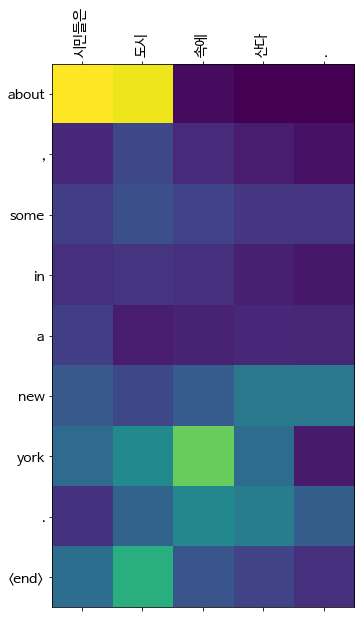

In [33]:
translate_visual("시민들은 도시 속에 산다.", encoder, decoder)

Input: 커피는 필요 없다 .
Predicted translation: you admit you <end> 


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator


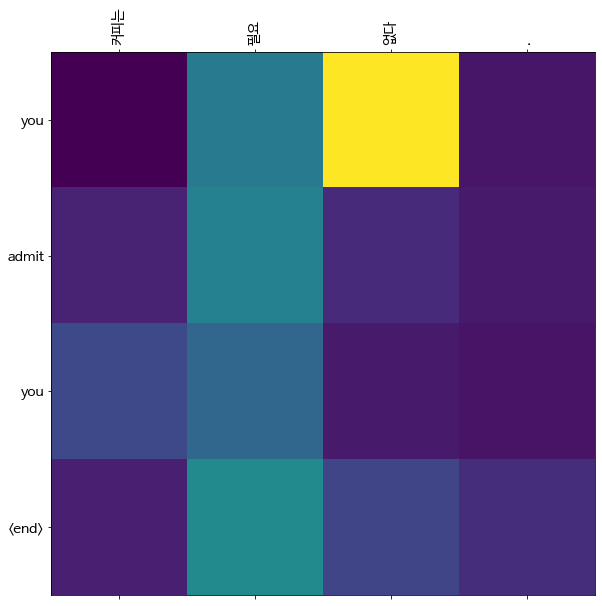

In [34]:
translate_visual("커피는 필요 없다.", encoder, decoder)

Input: 오바마는 대통령이다 .
Predicted translation: . . <end> 


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator


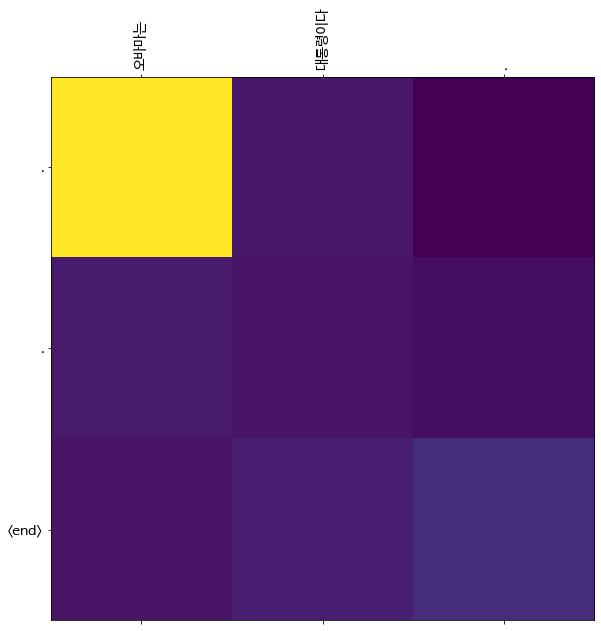

In [35]:
translate_visual("오바마는 대통령이다.", encoder, decoder)

Input: 일곱 명의 사망자가 발생했다 .
Predicted translation: several experts say is the president of . <end> 


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator


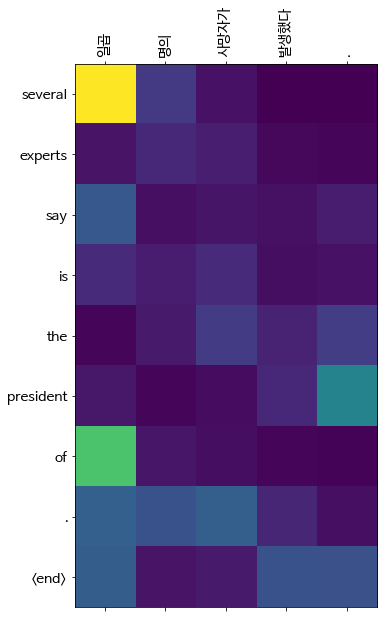

In [36]:
translate_visual("일곱 명의 사망자가 발생했다.", encoder, decoder)

##  회고

seven -> several 이렇게 번역된걸까요? 일곱이랑 several이 매칭되어있네요  
Input: 시민들은 도시 속에 산다 .  
Predicted translation: about , some in a new york . <end>   
이 문장은 그럴싸해보이긴 하지만 다른 결과들은 전반적으로 실망스럽습니다.  
loss값도 20Epoch 이후로는 증가하고 있습니다.  
학습이 잘 되었다고는 할 수 없겠네요  
데이터의 절대적인 수가 부족한 것도 있고, 자연어 번역자체가 노드에서 언급했던 대로 난이도가 너무 높은 작업이어서 그런것같습니다.
 